<a href="https://colab.research.google.com/github/minalang/study_code_paper/blob/main/%EC%BD%94%ED%85%8C%EC%9D%B8%EA%B0%95_dfs_bfs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DFS, BFS

## [선수지식] 재귀함수와 스택

In [ ]:
def DFS_srt(x):
  if x>0:
    DFS_srt(x-1)
    print(x, end = ' ')

def DFS_reversed(x):
  if x>0:
    print(x,  end = ' ')
    DFS_reversed(x-1)

In [ ]:
n = 3

DFS_srt(n) #출력값 1 2 3
print('\n')
DFS_reversed(n) #출력값 3 2 1

1 2 3 

3 2 1 

왜? 재귀함수가 stack을 사용하기 때문

## 1. 재귀함수를 이용한 이진수 출력

10진수 N이 입력되면 2진수로 변환하여 출력하는 프로그램 작성<br>

입력: 11 출력: 1011

** 출력의 순서를 바꾸고 싶다면 함수 내에서 순서를 바꾸면 됨! **

In [ ]:
def binary(x):
  if x==0:
    return
  else:
    binary(x//2) # 몫으로 호출
    print(x%2, end = '')


if __name__ == "__main__":
  n = int(input())
  binary(n)

11
1011

## 2. 이진트리 순회(DFS)

아래 그림과 같은 이진트리를 전위순회와 후위순회를 연습해보세요

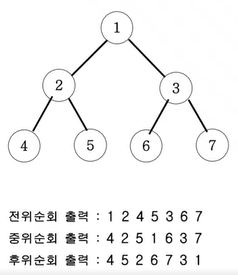

재귀를 이용한 깊이우선탐색
- 전위순회: 부모먼저->왼쪽자식->오른쪽자식<br>
순회하는 본연의 노드값을 먼저 출력하고 탐색하는 것
- 중위순회: 왼쪽자식->부모->오른쪽자식
- 후위순회: 왼쪽자식->오른쪽자식->부모

왼쪽자식은 *2, 오른쪽 자식은 *2+1

In [ ]:
# 초심자의 깊이우선 탐색은 if else구문으로
# 숫자의 범위를 보고 함수를 종료할 조건을 if에, 가지를 뻗을 조건을 else로 해서 뻗어가기

## 전위순회방식: 보통완전탐색에서는 전위순회방식임
def DFS1(v):
  if v>7:
    return #함수를 종료
  else:
    print(v, end = ' ') #부모의 노드를 출력함
    DFS1(v*2) #부모의 왼쪽 노드로 가지를 뻗음
    DFS1(v*2+1) #부모의 오른쪽 노드 가지를 뻗음

if __name__ == "__main__":
  DFS1(1)

1 2 4 5 3 6 7 

In [ ]:
## 중위순회방식
def DFS2(v):
  if v>7:
    return # 함수 종료
  else:
    DFS2(v*2) # 부모의 왼쪽노드로 가지를 뻗음
    print(v, end = ' ') # 부모가 중간에서 처리됨
    DFS2(v*2+1) # 부모의 오른쪽 노드로 가지를 뻗음

if __name__ == "__main__":
  DFS2(1)

4 2 5 1 6 3 7 

In [ ]:
## 후위순회방식
## 병합정렬에서 후위순회가 대표적으로 쓰인다.
def DFS3(v):
  if v>7:
    return # 함수 종료
  else:
    DFS3(v*2) # 부모의 왼쪽노드로 가지를 뻗음
    DFS3(v*2+1) # 부모의 오른쪽 노드로 가지를 뻗음
    print(v, end = ' ') # 부모가 마지막으로 처리됨

if __name__ == "__main__":
  DFS3(1)

4 5 2 6 7 3 1 

## 3. 부분집합 구하기

자연수 N이 주어지면 1부터 N까지의 원소를 갖는 집합의 부분집합을 모두 출력하는 프로그램 작성<br>
- 입력: 자연수(1~10)
- 출력 깊이우선탐색 전위순회방식으로 출력
- 입력예제: 3
- 출력예제:<br>
1 2 3<br>
1 2<br>
1 3<br>
1<br>
2 3<br>
2<br>
3



*상태트리*를 구축
dfs(1) -> 넣을건지, 넣지않느냐<br>
dfs(2) -> 넣을건지, 넣지않느냐<br>
dfs(3) -> 넣을건지, 넣지않느냐<br>
총 8가지 경우의 수 출력 + 공집합을 뺌


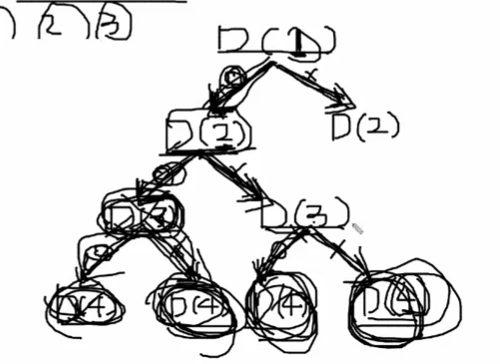

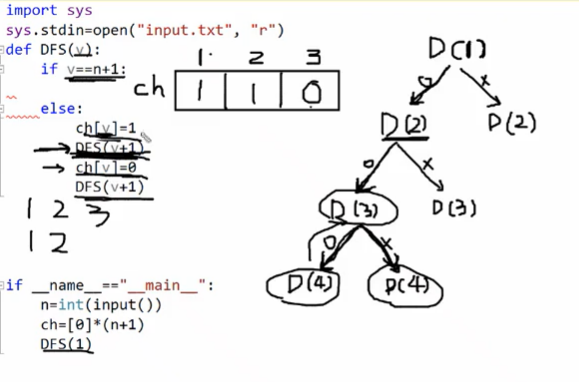

In [ ]:
def DFS(v):
  if v==n+1: # 종료지점, ch에 체크된 인덱스를 출력해줌
    for i in range(1, n+1):
      if ch[i] == 1:
        print(i, end = ' ')
    print()
  else:
    ch[v] = 1 # 사용한다는 것으로 호출이 넘어갈 때
    DFS(v+1)
    ch[v] = 0 #사용하지 않는다는 것으로 호출이 넘어갈 때
    DFS(v+1)


if __name__ == "__main__":
  n = int(input('input: '))
  ch = [0]*(n+1)
  #원소를 사용했는지 아닌지를 알려주는 check변수, 넉넉하게 n+1개로 함
  DFS(1)

input: 3
1 2 3 
1 2 
1 3 
1 
2 3 
2 
3 



## 4. 합이 같은 부분집합(DFS)
N개의 원소로 구성된 자연수 집합이 주어지면, 이 집합을 두 개의 부분집합으로 나누었을 때 두 부분집합의 원소의 합이 서로 같은 경우가 존재하면 YES를 출력하고, 그렇지 않으면 NO를 출력하는 프로그램을 작성하시오.<br>
예: {1, 3, 5, 6, 7,10}이면<br>
{1, 3, 5, 7} = {6, 10}으로 합이 같

첫번째 원소: 자연수 N(1~10)<br>

두번째 원소: 집합의 원소N개가 주어짐<br>

왼쪽은 사용하겠다<br>
오른쪽은 사용하지않겠다


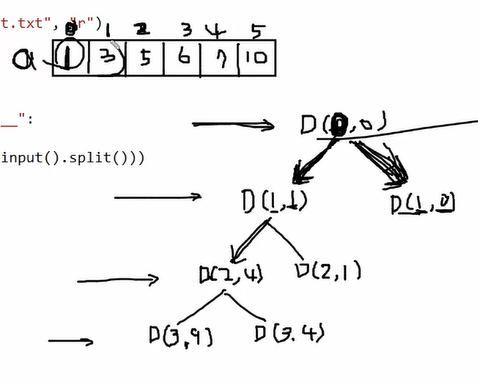

In [ ]:
import sys

def DFS(L, sum):
  #level의 값, sum의 값
  #level이 원소의 개수가 되었을 때 멈춤
  if L == n:
    if sum == (total-sum):
      print('YES')
      sys.exit(0)#프로그램 종료
  else:
    DFS(L+1, sum+a[L]) #원소로 사용할 때
    DFS(L+1, sum) #원소로 사용하지 않을 때


if __name__ == "__main__":
  n = int(input())
  a = list(map(int, input().split()))
  total = sum(a)
  DFS(0, 0)
  #프로그램이 종료되고 여기로 다시 복귀했을 때
  print("NO")

#### 시간복잡도 줄이기
sum이 total의 절반을 넘었다면 그 밑으로 가닥을 뻗을 필요가 있을까? 아님!<br>
총합이 홀수인 경우 //2했을 때 같은 자연수가 나올 수 있어 홀수에서는 //2는 하면 안됨 ☘


In [ ]:
# 시간복잡도 줄이기
import sys

def DFS(L, sum):
  #level의 값, sum의 값
  #level이 원소의 개수가 되었을 때 멈춤
  if sum>total//2:
    return # 총합 절반 이상이면 계산하지않음


  if L == n:
    if sum == (total-sum):
      print('YES')
      sys.exit(0)#프로그램 종료
  else:
    DFS(L+1, sum+a[L]) #원소로 사용할 때
    DFS(L+1, sum) #원소로 사용하지 않을 때


if __name__ == "__main__":
  n = int(input())
  a = list(map(int, input().split()))
  total = sum(a)
  DFS(0, 0)
  #프로그램이 종료되고 여기로 다시 복귀했을 때
  print("NO")

### 잠깐 지식 전역변수와 지역변수
전역변수:
- 메인 스크립트에서 선언
- 변수가 생성되고 값이 할당됨
- 모든 함수가 접근할 수 있음(공통)

지역변수:
- 함수 안에 있음(먼저 우선하게 찾음)




In [ ]:
def DFS1():
  cnt=3 # cnt라는 변수를 만들고 3을 할당함, 지역변수를 만듦
  print(cnt) # 이건 이제 3을 출력함

def DFS2():
  global cnt # 전역변수군
  if cnt == 5:
    cnt = cnt+1
    print(cnt) #전역변수를 바꿨음


if __name__ == '__main__':
  cnt = 5
  DFS1()
  DFS2()
  print(cnt) #그래서 여기도 6이 됨

3
6
6


In [ ]:
# 리스트는?

def DFS():
  a[0] = 7 #새로운 리스트를 생성한게 아니라 단순히 값을 바꿔준 것
  print(a)

if __name__ == '__main__':
  a = [1, 2, 3] #전역 리스트
  DFS()
  print(a)

In [ ]:
def DFS():
  a = a+[4] #아무것도 할당되지않은 지역 리스트에 새로운 리스르를 더할 수 없음
  print(a)

if __name__ == '__main__':
  a = [1, 2, 3] #전역 리스트
  DFS()
  print(a)

UnboundLocalError: local variable 'a' referenced before assignment

In [ ]:
def DFS():
  global a #글로벌 리스트도 가능함!_!
  a = a+[4] #아무것도 할당되지않은 지역 리스트에 새로운 리스트를 더할 수 없음
  print(a)

if __name__ == '__main__':
  a = [1, 2, 3] #전역 리스트
  DFS()
  print(a)

[1, 2, 3, 4]
[1, 2, 3, 4]


## 5. 바둑이 승차(DFS)
(4번 문제와 유사)<br>
철수는 그의 바둑이들을 데리고 시장에 가려고 한다. 그런데 그의 트럭은 C킬로그램 넘게 태울 수가 없다. 철수는 C를 넘지 않으면서 그의 바둑이들을 무겁게 태우고 싶다.
N마리의 바득이와 각 바둑이의 무게 W가 주어지면, 철수가 철수가 트럭에 태울 수 있는 가장 무거운 무게를 구하는 프로그램을 작성하세요.

- 입력설명
자연수 C와 N(1<=N<=30)이 주어짐.둘째줄부터 N마리의 바둑이의 무게가 주어짐
- 출력
첫번째 줄에서 가장 무거운 무게를 출력

In [ ]:
# 여러 경우의 수가 있을 것 같음
## 내 풀이

def DFS(L, sum):
  if L == num:
    if sum <= c:
      c_list.append(sum)
    else:
      return
    return
  else:
    DFS(L+1, sum+input_list[L]) #원소로 사용할 때
    DFS(L+1, sum) #원소로 사용하지 않을 때


if __name__ == "__main__":
  c_list = []
  c, num = map(int, input().split())
  input_list = []
  for i in range(num):
    a = int(input())
    input_list.append(a)

  DFS(0, 0)
  print(c_list)
  print(max(c_list))

259 5
81
58
42
33
61
[214, 242, 181, 233, 172, 200, 139, 217, 156, 184, 123, 175, 114, 142, 81, 194, 133, 161, 100, 152, 91, 119, 58, 136, 75, 103, 42, 94, 33, 61, 0]
242


In [ ]:
## 선생님 풀이: 시간초과가 난다..!

import sys
from collections import deque
def DFS(L, sum): #level, sum
  global result
  if sum>c: #무게제한 설정
    return
  if L == n: #부분집합 하나가 완성되는 말단노드에 도착!
    if sum > result: #여기서 초기화안했으니..
      result = sum #재할당했으니 로컬변수인데
    else:
      DFS(L+1, sum+a[L]) # 그 다음 원소를 포함(왼쪽으로 뻗음)
      DFS(L+1, sum) # 그 다음 원소를 포함하지 않음(오른쪽으로 뻗음)

if __name__ == '__main__':
  c, n = map(int, input().split())
  a = [0]*n
  result = -21470000000
  for i in range(n):
    a[i] = int(input())
  DFS(0, 0)
  print(result)


In [ ]:
## 시간초과 피하는 선생님 풀이

import sys
from collections import deque
def DFS(L, sum, tsum): #level, sum, tsum(판단을 한 무게)
  global result #전역변수로 선언하기
  # 앞으로 판단해야할 무게(total-sum)
  if sum+(total-tsum) < result: #result보다 좋은 무게가 안나온다
    return

  if sum>c: #무게제한 설정
    return
  if L == n: #부분집합 하나가 완성되는 말단노드에 도착!
    if sum > result: #여기서 초기화안했으니..
      result = sum #재할당했으니 로컬변수인데
    else:
      # 판단을 한 무게(tsum+a[L])
      DFS(L+1, sum+a[L], tsum+a[L]) # 그 다음 원소를 포함(왼쪽으로 뻗음)
      DFS(L+1, sum, tsum+a[L]) # 그 다음 원소를 포함하지 않음(오른쪽으로 뻗음)

if __name__ == '__main__':
  c, n = map(int, input().split())
  a = [0]*n
  result = -21470000000
  for i in range(n):
    a[i] = int(input())
  total = sum(a)
  DFS(0, 0, 0)
  print(result)

## 6. 중복순열 구하기(DFS)

1부터 N까지 번호가 적힌 구슬이 있습니다. 이 중 중복을 허락하여 M번을 뽑아 일렬로 나열하는 방법 모두 출력
- 입력
첫번째 줄에 N(3<=N<=10), M(2<=M<=N)
- 출력
첫번째 줄에 결과를 출력, 맨 마지막 총 경우의 수를 출력
출력 순서는 사전순으로 오름차순

In [ ]:
import sys
#input = sys.stdin.readline
#s = input().rstrip() # 문자열 입력일 때 줄바꿈기호까지 같이 읽기때문에 지워주기

def DFS(L):
  global cnt
  if L == m:
    for j in res:
      print(j, end = ' ')
    print() #줄바꿈
    # print(' '.join(res))
    # for j in range(m):
    #   print(res[j], end = ' ')
    #   print()
    cnt+=1 #res를 출력
  else:
    for i in range(1, n+1):
      res[L] = i
      DFS(L+1)

if __name__ == "__main__":
  n, m = map(int, input().split())
  res = [0]*m
  cnt = 0
  DFS(0)
  print(cnt)

3 2
1 1 
1 2 
1 3 
2 1 
2 2 
2 3 
3 1 
3 2 
3 3 
9


## 7. 동전교환
다음과 같이 여러 단위의 동전들이 주어져 있을 때 거스름돈을 가장 적은 수의 동전으로 교환해주려면 어떻게 주면 되는가? 각 단위의 동전은 무한정 쓸 수 있다
<br>
첫 번째 줄 동전의 종류 개수(1<=N<=12)<br>
두 번째 줄에는 N개의 동전종류, 거슬러줄 금액M(1<=M<=500)이 주어짐<br>
각 동전의 종류는 100원을 넘지 않는다.<br>
거슬러 줄 동전의 최소개수를 출력<br>

예시 <br>
3<br>
1 2 5<br>
15<br>
5 5 5 동전 3개로 거슬러 줄 수 있다.

In [ ]:
# 스스로 풀려고 노력함 - 잘 안됨ㅠㅅㅠ
def DFS(L, sum):
  sum = 0
  for i in range(len(n_list)):
    sum+=res[i]*n_list[i]
  if sum == m:
    cnt_list.append(sum(res))
  else:

    for i in range(len_list)):
      res[L] = i
      DFS(L+1)

if __name__ == "__main__":
  n = int(input())
  n_list = list(map(int, input().split()))
  m = int(input()) #더하면 m이 나와야함
  res = [0]*len(n_list)
  cnt_list = []
  DFS(0, 0)
  print(min(cnt_list))

3
1 2 5
15


IndexError: list assignment index out of range

In [2]:
def DFS(L, sum): #L이 사용하는 동전의 수, sum이 합한 동전 수
  global res
  if sum>m:
    return
  if sum == m:
    if L<res: #지역변수가 됨
      res = L #값을 바꾸니까
  else:
    for i in range(n):
      DFS(L+1, sum+a[i]) #합을 이런식으로 더해나감

if __name__ == "__main__":
  n = int(input())
  a = list(map(int, input().split())) #동전의 종류
  m = int(input()) #더하면 m이 나와야함
  res = 2147000000
  a.sort(reverse = True) #큰 금액부터 탐색하기
  DFS(0, 0)
  print(res)

3
1 2 5
15
3


In [ ]:
## cut-off edge

def DFS(L, sum): #L이 사용하는 동전의 수, sum이 합한 동전 수
  global res
  if L>res: #L이 지금 구한 최솟값보다 큰데 sum이 m보다 작은 경우 더 구할 필요가 없다
    return
  if sum>m:
    return
  if sum == m:
    if L<res: #지역변수가 됨
      res = L #값을 바꾸니까
  else:
    for i in range(n):
      DFS(L+1, sum+a[i]) #합을 이런식으로 더해나감

if __name__ == "__main__":
  n = int(input())
  a = list(map(int, input().split())) #동전의 종류
  m = int(input()) #더하면 m이 나와야함
  res = 2147000000
  a.sort(reverse = True) #큰 금액부터 탐색하기
  DFS(0, 0)
  print(res)

## 8. 순열 구하기
1부터 N까지 번호가 적힌 구슬이 있다. 이 중 M개를 뽑아 일렬로 나열하는 방법 모두 출력<br>

첫째줄 자연수 N과 M<br>
결과 출력하기. 맨 마지막에 총 경우의 수 출력하기

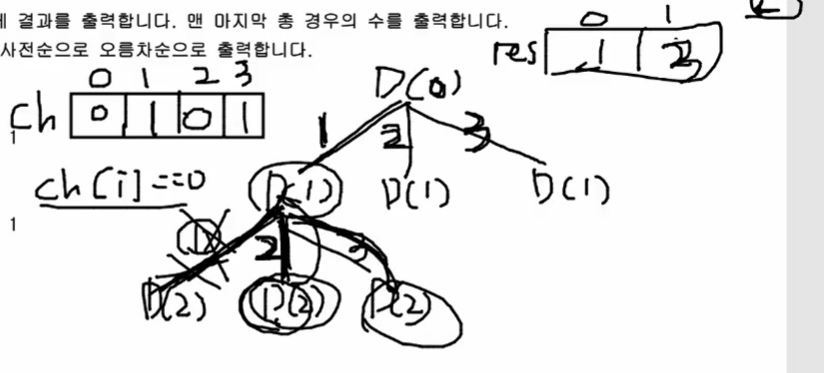

In [4]:
# 중복이 아닌 순열
## 체크리스트(ch)를 만들어 중복인지 아닌지 확인하도록함(수가 포함되었을 때는 1, 상태 트리가 다시 돌아갈 때는 0으로 업데이트 해주어야함)

def DFS(L): #level이 m이면 멈추고 출력하면 됨
  global cnt
  if L == m:
    for j in res:
      print(j, end = ' ')
    print() # 줄바꿈
    cnt+=1
    # ch푸는게 이 지점일 것 같은데 어떻게 해야하는지 모르겠음
  else:
    for i in range(1, n+1):
      if ch[i] == 1:
        return #아예 for loop을 나가게 되어 다른 답이 나오게됨
      else:
        ch[i] = 1
        res[L] = i ##이거 빼먹음!! 첫번쨰에 넣은 수
        DFS(L+1)
        ##### 여기에 넣으면 됨 #####
        ch[i] = 0 #했던 행동을 취소시켜줌: 되돌아 왔을 때 1을 넣었던 부분을 취소해주는 역할


if __name__  == "__main__":
  n, m = map(int, input().split(' '))
  cnt = 0
  res = [0]*m
  ch = [0]*(n+1)
  DFS(0)
  print(cnt)

3 2
2 1 
3 1 
3 2 
3


In [5]:
def DFS(L): #level이 m이면 멈추고 출력하면 됨
  global cnt
  if L == m:
    for j in res:
      print(j, end = ' ')
    print() # 줄바꿈
    cnt+=1
    # ch푸는게 이 지점일 것 같은데 어떻게 해야하는지 모르겠음
  else:
    for i in range(1, n+1):
      if ch[i] == 1:
        pass #break나 return으로 멈추면 아예 for loop을 나가게 되니까 pass나 continue로 이어갈 수 있게 해주는게 맞음!!
      else:
        ch[i] = 1
        res[L] = i ##이거 빼먹음!! 첫번쨰에 넣은 수
        DFS(L+1)
        ##### 여기에 넣으면 됨 #####
        ch[i] = 0 #했던 행동을 취소시켜줌: 되돌아 왔을 때 1을 넣었던 부분을 취소해주는 역할


if __name__  == "__main__":
  n, m = map(int, input().split(' '))
  cnt = 0
  res = [0]*m
  ch = [0]*(n+1)
  DFS(0)
  print(cnt)

3 2
1 2 
1 3 
2 1 
2 3 
3 1 
3 2 
6


In [3]:
# 선생님 코드
def DFS(L): #level이 m이면 멈추고 출력하면 됨
  global cnt
  if L == m:
    for j in res:
      print(j, end = ' ')
    print() # 줄바꿈
    cnt+=1
  else:
    for i in range(1, n+1):
      if ch[i] == 0:
        ch[i] = 1
        res[L] = i ##이거 빼먹음!! 첫번쨰에 넣은 수
        DFS(L+1)
        ##### 여기에 넣으면 됨 #####
        ch[i] = 0 #했던 행동을 취소시켜줌: 되돌아 왔을 때 1을 넣었던 부분을 취소해주는 역할


if __name__  == "__main__":
  n, m = map(int, input().split(' '))
  cnt = 0
  res = [0]*m
  ch = [0]*(n+1)
  DFS(0)
  print(cnt)

3 2
1 2 
1 3 
2 1 
2 3 
3 1 
3 2 
6


## 9. 수열 추측하기